In [2]:
from matplotlib.colors import ListedColormap
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd 
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import pandas as pd
from pyproj import Transformer


In [4]:
xlimit = (1025000, 1140000)
ylimit = (-2148431.9935, -2033743.9935)

xlimit2 = (1025000, 1210000)
ylimit2 = (-2148431.9935, -2033743.9935)

In [6]:
tif_path = "VEL_mean_masked.tif"
with rasterio.open(tif_path) as src:
    vel_mean = src.read(1)
    extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]

groundingline = gpd.read_file('2003_GL_full_cook_complete_dissolved_larger.shp')
coastline = gpd.read_file('ice_front_2006.shp')
passive_boundary = gpd.read_file('passive_boundary.shp')

In [8]:
flux_df = pd.read_excel('Yearly_Flux_at_GL.xlsx')
flux_year = flux_df['Year']
flux = flux_df['Flux (Gt/yr)']

C:\Users\jjls0\AppData\Local\Temp\ipykernel_24532\174683649.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('plasma', n)
C:\Users\jjls0\AppData\Local\Temp\ipykernel_24532\174683649.py:76: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('plasma', n)


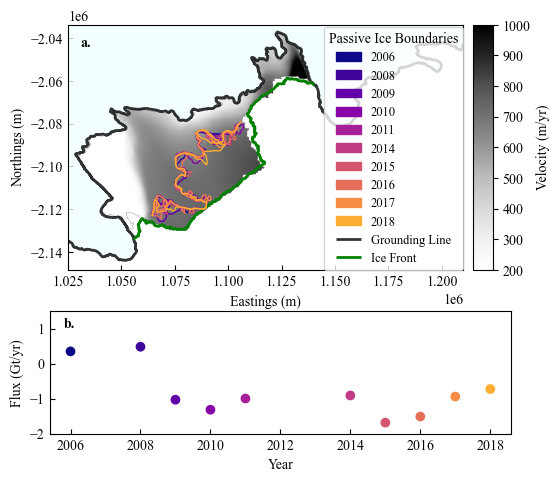

In [10]:
fig, axes = plt.subplots(2, 1, figsize=(160/25.4, 120/25.4), gridspec_kw={'height_ratios': [2,1]})

ax0 = axes[0]
vel_mean = np.ma.masked_invalid(vel_mean)
solid_cmap = ListedColormap(['white'])

first_img_plot = ax0.imshow(vel_mean, cmap='Greys', extent=extent, origin='upper', vmin=200, vmax=1000)

groundingline.plot(ax=ax0, edgecolor='black', facecolor='azure', linewidth=2, label='Grounding Line', alpha=0.8)
coastline.plot(ax=ax0, edgecolor='green', facecolor='none', linewidth=2, label='Ice Front')

# Passive ice boundary colours
years = passive_boundary['Year'].unique()
years.sort()
n = len(years) + 2
cmap = cm.get_cmap('plasma', n)
norm = mcolors.Normalize(vmin=years.min(), vmax=years.max())
color_map = {year: cmap(i / (n - 1)) for i, year in enumerate(years)}

legend_handles = []
for year in years:
    color = color_map[year]
    subset = passive_boundary[passive_boundary['Year'] == year]
    for geom in subset.geometry:
        if geom.geom_type == 'MultiLineString':
            for part in geom.geoms:
                xs, ys = part.xy
                ax0.plot(xs, ys, color=color, linewidth=1, label=None)
        elif geom.geom_type == 'LineString':
            xs, ys = geom.xy
            ax0.plot(xs, ys, color=color, linewidth=1, label=None)
    patch = mpatches.Patch(color=color, label=str(year))
    legend_handles.append(patch)

extra_handles, extra_labels = ax0.get_legend_handles_labels()
legend_handles = legend_handles + extra_handles
legend = ax0.legend(
    handles=legend_handles,
    title='Passive Ice Boundaries',
    loc='lower right',
    borderaxespad=0,
    ncol=1,
    prop={'size': 9, 'family': 'Times New Roman'},
    title_fontsize=9
)
legend.get_frame().set_linewidth(1)
legend.get_title().set_fontsize(10)
legend.get_title().set_fontfamily('Times New Roman')

divider0 = make_axes_locatable(ax0)
cax0 = divider0.append_axes("right", size="5%", pad=0.1)
cbar0 = fig.colorbar(first_img_plot, cax=cax0)
for label in cbar0.ax.get_yticklabels():
    label.set_fontname('Times New Roman')
    label.set_fontsize(10)
cbar0.set_label("Velocity (m/yr)", fontsize=10, fontfamily='Times New Roman')

ax0.set_xlabel('Eastings (m)', fontsize=10, fontfamily='Times New Roman')
ax0.set_ylabel('Northings (m)', fontsize=10, fontfamily='Times New Roman')
for label in (ax0.get_xticklabels() + ax0.get_yticklabels()):
    label.set_fontsize(10)
    label.set_family('Times New Roman')
ax0.xaxis.get_offset_text().set_fontname('Times New Roman')
ax0.xaxis.get_offset_text().set_fontsize(10)
ax0.yaxis.get_offset_text().set_fontname('Times New Roman')
ax0.yaxis.get_offset_text().set_fontsize(10)
ax0.tick_params(direction='in')
ax0.set_xlim(xlimit2)
ax0.set_ylim(ylimit2)
ax0.set_aspect('equal')

#########################################################

ax1 =axes[1]
n = len(flux_year) + 2
cmap = cm.get_cmap('plasma', n)
flux_colour_dict = {year: cmap(i / (n - 1)) for i, year in enumerate(sorted(set(flux_year)))}
flux_colours = [flux_colour_dict[year] for year in flux_year]

second_plot = ax1.scatter(flux_year, flux, c = flux_colours)
ax1.set_xlabel('Year', fontsize=10, fontfamily='Times New Roman')
ax1.set_ylabel('Flux (Gt/yr)', fontsize=10, fontfamily='Times New Roman')
ax1.set_ylim(-2, 1.5)
for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set_fontsize(10)
    label.set_family('Times New Roman')
ax1.xaxis.get_offset_text().set_fontname('Times New Roman')
ax1.xaxis.get_offset_text().set_fontsize(10)
ax1.yaxis.get_offset_text().set_fontname('Times New Roman')
ax1.yaxis.get_offset_text().set_fontsize(10)
ax1.tick_params(direction='in')
ax1.set_aspect('equal')

#########################################################
ax0.text(0.03, 0.95, "a.", transform=ax0.transAxes, fontsize=10, fontname = 'Times New Roman', fontweight='bold', va='top', ha='left')
ax1.text(0.03, 0.95, "b.", transform=ax1.transAxes, fontsize=10, fontname = 'Times New Roman', fontweight='bold', va='top', ha='left')

plt.tight_layout(pad=0.1, h_pad=0.2)
#plt.savefig('figure_1_proper.jpg', dpi=500, bbox_inches='tight')
plt.show()

C:\Users\jjls0\AppData\Local\Temp\ipykernel_24532\3999895722.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('plasma', n)
C:\Users\jjls0\AppData\Local\Temp\ipykernel_24532\3999895722.py:77: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('plasma', n)


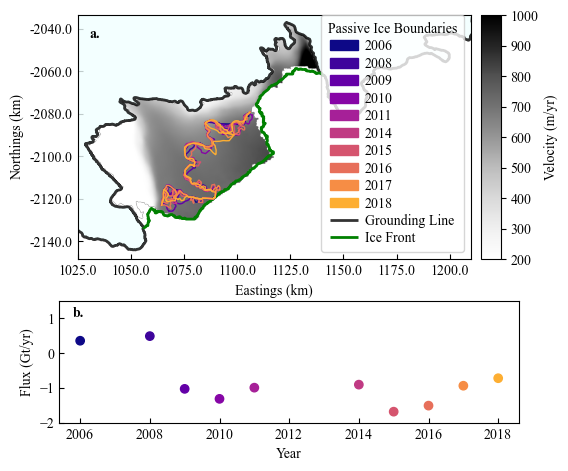

In [30]:
fig, axes = plt.subplots(2, 1, figsize=(160/25.4, 120/25.4), gridspec_kw={'height_ratios': [2,1]})

ax0 = axes[0]
vel_mean = np.ma.masked_invalid(vel_mean)
solid_cmap = ListedColormap(['white'])

first_img_plot = ax0.imshow(vel_mean, cmap='Greys', extent=extent, origin='upper', vmin=200, vmax=1000)

groundingline.plot(ax=ax0, edgecolor='black', facecolor='azure', linewidth=2, label='Grounding Line', alpha=0.8)
coastline.plot(ax=ax0, edgecolor='green', facecolor='none', linewidth=2, label='Ice Front')

# Passive ice boundary colours
years = passive_boundary['Year'].unique()
years.sort()
n = len(years) + 2
cmap = cm.get_cmap('plasma', n)
norm = mcolors.Normalize(vmin=years.min(), vmax=years.max())
color_map = {year: cmap(i / (n - 1)) for i, year in enumerate(years)}

legend_handles = []
for year in years:
    color = color_map[year]
    subset = passive_boundary[passive_boundary['Year'] == year]
    for geom in subset.geometry:
        if geom.geom_type == 'MultiLineString':
            for part in geom.geoms:
                xs, ys = part.xy
                ax0.plot(xs, ys, color=color, linewidth=1, label=None)
        elif geom.geom_type == 'LineString':
            xs, ys = geom.xy
            ax0.plot(xs, ys, color=color, linewidth=1, label=None)
    patch = mpatches.Patch(color=color, label=str(year))
    legend_handles.append(patch)

extra_handles, extra_labels = ax0.get_legend_handles_labels()
legend_handles = legend_handles + extra_handles
legend = ax0.legend(
    handles=legend_handles,
    title='Passive Ice Boundaries',
    loc='lower right',
    prop={'size': 10, 'family': 'Times New Roman'},
    title_fontsize=10,
    borderpad=0.5,        # remove padding around the legend
    labelspacing=0.25,     # reduce spacing between entries
    handletextpad=0.5,  # space between marker and text (adjust as needed)
    handlelength=2      # length of the marker in legend
)
legend.get_frame().set_linewidth(1)
legend.get_title().set_fontfamily('Times New Roman')

divider0 = make_axes_locatable(ax0)
cax0 = divider0.append_axes("right", size="5%", pad=0.1)
cbar0 = fig.colorbar(first_img_plot, cax=cax0)
for label in cbar0.ax.get_yticklabels():
    label.set_fontname('Times New Roman')
    label.set_fontsize(10)
cbar0.set_label("Velocity (m/yr)", fontsize=10, fontfamily='Times New Roman')

ax0.set_xlabel('Eastings (m)', fontsize=10, fontfamily='Times New Roman')
ax0.set_ylabel('Northings (m)', fontsize=10, fontfamily='Times New Roman')
for label in (ax0.get_xticklabels() + ax0.get_yticklabels()):
    label.set_fontsize(10)
    label.set_family('Times New Roman')
ax0.xaxis.get_offset_text().set_fontname('Times New Roman')
ax0.xaxis.get_offset_text().set_fontsize(10)
ax0.yaxis.get_offset_text().set_fontname('Times New Roman')
ax0.yaxis.get_offset_text().set_fontsize(10)
ax0.tick_params(direction='in')
ax0.set_xlim(xlimit2)
ax0.set_ylim(ylimit2)
ax0.set_aspect('equal')

#########################################################

ax1 =axes[1]
n = len(flux_year) + 2
cmap = cm.get_cmap('plasma', n)
flux_colour_dict = {year: cmap(i / (n - 1)) for i, year in enumerate(sorted(set(flux_year)))}
flux_colours = [flux_colour_dict[year] for year in flux_year]

second_plot = ax1.scatter(flux_year, flux, c = flux_colours)
ax1.set_xlabel('Year', fontsize=10, fontfamily='Times New Roman')
ax1.set_ylabel('Flux (Gt/yr)', fontsize=10, fontfamily='Times New Roman')
ax1.set_ylim(-2, 1.5)
for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set_fontsize(10)
    label.set_family('Times New Roman')
ax1.xaxis.get_offset_text().set_fontname('Times New Roman')
ax1.xaxis.get_offset_text().set_fontsize(10)
ax1.yaxis.get_offset_text().set_fontname('Times New Roman')
ax1.yaxis.get_offset_text().set_fontsize(10)
ax1.tick_params(direction='in')
ax1.set_aspect('equal')


from matplotlib.ticker import FuncFormatter

# Convert axes from meters to kilometers
ax0.xaxis.set_major_formatter(FuncFormatter(lambda x, _: x/1000))
ax0.yaxis.set_major_formatter(FuncFormatter(lambda y, _: y/1000))

# Update labels
ax0.set_xlabel('Eastings (km)', fontsize=10, fontfamily='Times New Roman')
ax0.set_ylabel('Northings (km)', fontsize=10, fontfamily='Times New Roman')

#########################################################
ax0.text(0.03, 0.95, "a.", transform=ax0.transAxes, fontsize=10, fontname = 'Times New Roman', fontweight='bold', va='top', ha='left')
ax1.text(0.03, 0.95, "b.", transform=ax1.transAxes, fontsize=10, fontname = 'Times New Roman', fontweight='bold', va='top', ha='left')

plt.tight_layout(pad=0.1, h_pad=0.2)
#plt.savefig('FINAL_FIG_8.jpg', dpi=500, bbox_inches='tight')
plt.show()